# Importing Data

In [30]:
import csv

file = open('archive/IPIP-FFM-data-8Nov2018/data-final.csv')
csvreader = csv.reader(file)

header = []
header = next(csvreader)
header = header[0].split("\t")
print("Columns: ")
print(header)

rows = []
for row in csvreader:
    rows.append(row[0].split("\t"))
print("Number of rows: " + str(len(rows)))

file.close()

Columns: 
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IP

# Data Pre-Processing

To improve the overall data cleanliness, the rows in the current data preprocessing step that have an IPC (Internet Protocol Code) value greater than 1 have been removed. This strategy guarantees that any potential duplicate entries coming from a single source are eliminated, reducing the chance that spam data will be incorrectly incorporated into the resulting model training procedure.

In [31]:
print("Index of IPC value: " + str(header.index("IPC")))

rows = list(filter(lambda row: int(row[header.index("IPC")]) < 2, rows))

print(len(rows))

Index of IPC value: 106
696845


The next step entails converting the list object into a dataframe.

In [32]:
import pandas as pd
import numpy as np

data = pd.DataFrame(rows, columns = header)
print(data.head())

  EXT1 EXT2 EXT3 EXT4 EXT5 EXT6 EXT7 EXT8 EXT9 EXT10  ...  \
0    4    1    5    2    5    1    5    2    4     1  ...   
1    3    5    3    4    3    3    2    5    1     5  ...   
2    2    3    4    4    3    2    1    3    2     5  ...   
3    2    2    2    3    4    2    2    4    1     4  ...   
4    3    3    4    2    4    2    2    3    3     4  ...   

              dateload screenw screenh introelapse testelapse endelapse IPC  \
0  2016-03-03 02:01:01     768    1024           9        234         6   1   
1  2016-03-03 02:01:20    1360     768          12        179        11   1   
2  2016-03-03 02:01:56    1366     768           3        186         7   1   
3  2016-03-03 02:02:02    1920    1200         186        219         7   1   
4  2016-03-03 02:03:12    1600    1000           4        196         3   1   

  country lat_appx_lots_of_err long_appx_lots_of_err  
0      GB              51.5448                0.1991  
1      MY               3.1698               101

The choice has been made to remove all auxiliary columns from the dataset in order to condense the data and exclusively concentrate on the variables related to the questionnaire.

In [33]:
data = data.drop(['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], axis=1)
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
0,4,1,5,2,5,1,5,2,4,1,...,3146,4067,2959,3411,2170,4920,4436,3116,2992,4354
1,3,5,3,4,3,3,2,5,1,5,...,2624,4985,1684,3026,4742,3336,2718,3374,3096,3019
2,2,3,4,4,3,2,1,3,2,5,...,1930,1470,1644,1683,2229,8114,2043,6295,1585,2529
3,2,2,2,3,4,2,2,4,1,4,...,3456,6665,1977,3728,4128,3776,2984,4192,3480,3257
4,3,3,4,2,4,2,2,3,3,4,...,2104,5488,3656,4352,2681,3272,2640,1568,1640,3192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696840,4,1,4,2,4,3,3,2,3,2,...,4615,6676,2559,4325,1792,4317,4452,2053,6474,3851
696841,5,1,5,2,4,2,3,1,5,1,...,2117,6267,1717,2834,3771,3350,2552,4383,5401,1615
696842,4,3,4,3,3,3,4,4,3,3,...,2560,6632,2312,2376,2969,2271,4064,1144,2936,1615
696843,2,4,3,4,2,2,1,4,2,4,...,5024,4664,4792,6471,1873,3136,3129,2799,7184,2526


All variables related to timestamp information have been removed from the dataset in this specific data cleaning operation. This specifically required the removal of all features with the "_E" suffix.

In [34]:
timestamps = [i for i in header if i[-2:] == '_E']
print(timestamps)

['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']


In [35]:
data = data.drop(timestamps, axis=1)
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,4,2,4,2,2,3,3,4,...,5,1,5,1,3,1,5,4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696840,4,1,4,2,4,3,3,2,3,2,...,3,3,5,3,4,2,5,2,3,4
696841,5,1,5,2,4,2,3,1,5,1,...,4,1,4,2,3,2,5,3,4,4
696842,4,3,4,3,3,3,4,4,3,3,...,4,1,5,1,5,1,3,4,5,4
696843,2,4,3,4,2,2,1,4,2,4,...,5,2,4,2,3,2,4,5,5,3


The dataset's data type is being changed from a string format to a floating-point format (float64) in the current step.

In [36]:
cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696845 entries, 0 to 696844
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EXT1    695704 non-null  float64
 1   EXT2    695704 non-null  float64
 2   EXT3    695704 non-null  float64
 3   EXT4    695704 non-null  float64
 4   EXT5    695704 non-null  float64
 5   EXT6    695704 non-null  float64
 6   EXT7    695704 non-null  float64
 7   EXT8    695704 non-null  float64
 8   EXT9    695704 non-null  float64
 9   EXT10   695704 non-null  float64
 10  EST1    695704 non-null  float64
 11  EST2    695704 non-null  float64
 12  EST3    695704 non-null  float64
 13  EST4    695704 non-null  float64
 14  EST5    695704 non-null  float64
 15  EST6    695704 non-null  float64
 16  EST7    695704 non-null  float64
 17  EST8    695704 non-null  float64
 18  EST9    695704 non-null  float64
 19  EST10   695704 non-null  float64
 20  AGR1    695704 non-null  float64
 21  AGR2    69

The current step entails determining how many null or missing values are present in the dataset.

In [38]:
data.isnull().sum()

EXT1     1141
EXT2     1141
EXT3     1141
EXT4     1141
EXT5     1141
EXT6     1141
EXT7     1141
EXT8     1141
EXT9     1141
EXT10    1141
EST1     1141
EST2     1141
EST3     1141
EST4     1141
EST5     1141
EST6     1141
EST7     1141
EST8     1141
EST9     1141
EST10    1141
AGR1     1141
AGR2     1141
AGR3     1141
AGR4     1141
AGR5     1141
AGR6     1141
AGR7     1141
AGR8     1141
AGR9     1141
AGR10    1141
CSN1     1141
CSN2     1141
CSN3     1141
CSN4     1141
CSN5     1141
CSN6     1141
CSN7     1141
CSN8     1141
CSN9     1141
CSN10    1141
OPN1     1141
OPN2     1141
OPN3     1141
OPN4     1141
OPN5     1141
OPN6     1141
OPN7     1141
OPN8     1141
OPN9     1141
OPN10    1141
dtype: int64

The current step entails dropping all null or missing values that are present in the dataset.

In [39]:
data.dropna(axis=0, inplace=True)
print(len(data))

695704


In [40]:
print(data.shape)

(695704, 50)


In [41]:
print(data)

        EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0        4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1        3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2        2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3        2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4        3.0   3.0   4.0   2.0   4.0   2.0   2.0   3.0   3.0    4.0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
696840   4.0   1.0   4.0   2.0   4.0   3.0   3.0   2.0   3.0    2.0  ...   
696841   5.0   1.0   5.0   2.0   4.0   2.0   3.0   1.0   5.0    1.0  ...   
696842   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
696843   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
696844   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

        OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0        5.0   1.

To better understand the underlying data patterns, the current step entails visualizing the distribution of the dataset through the creation of a histogram.

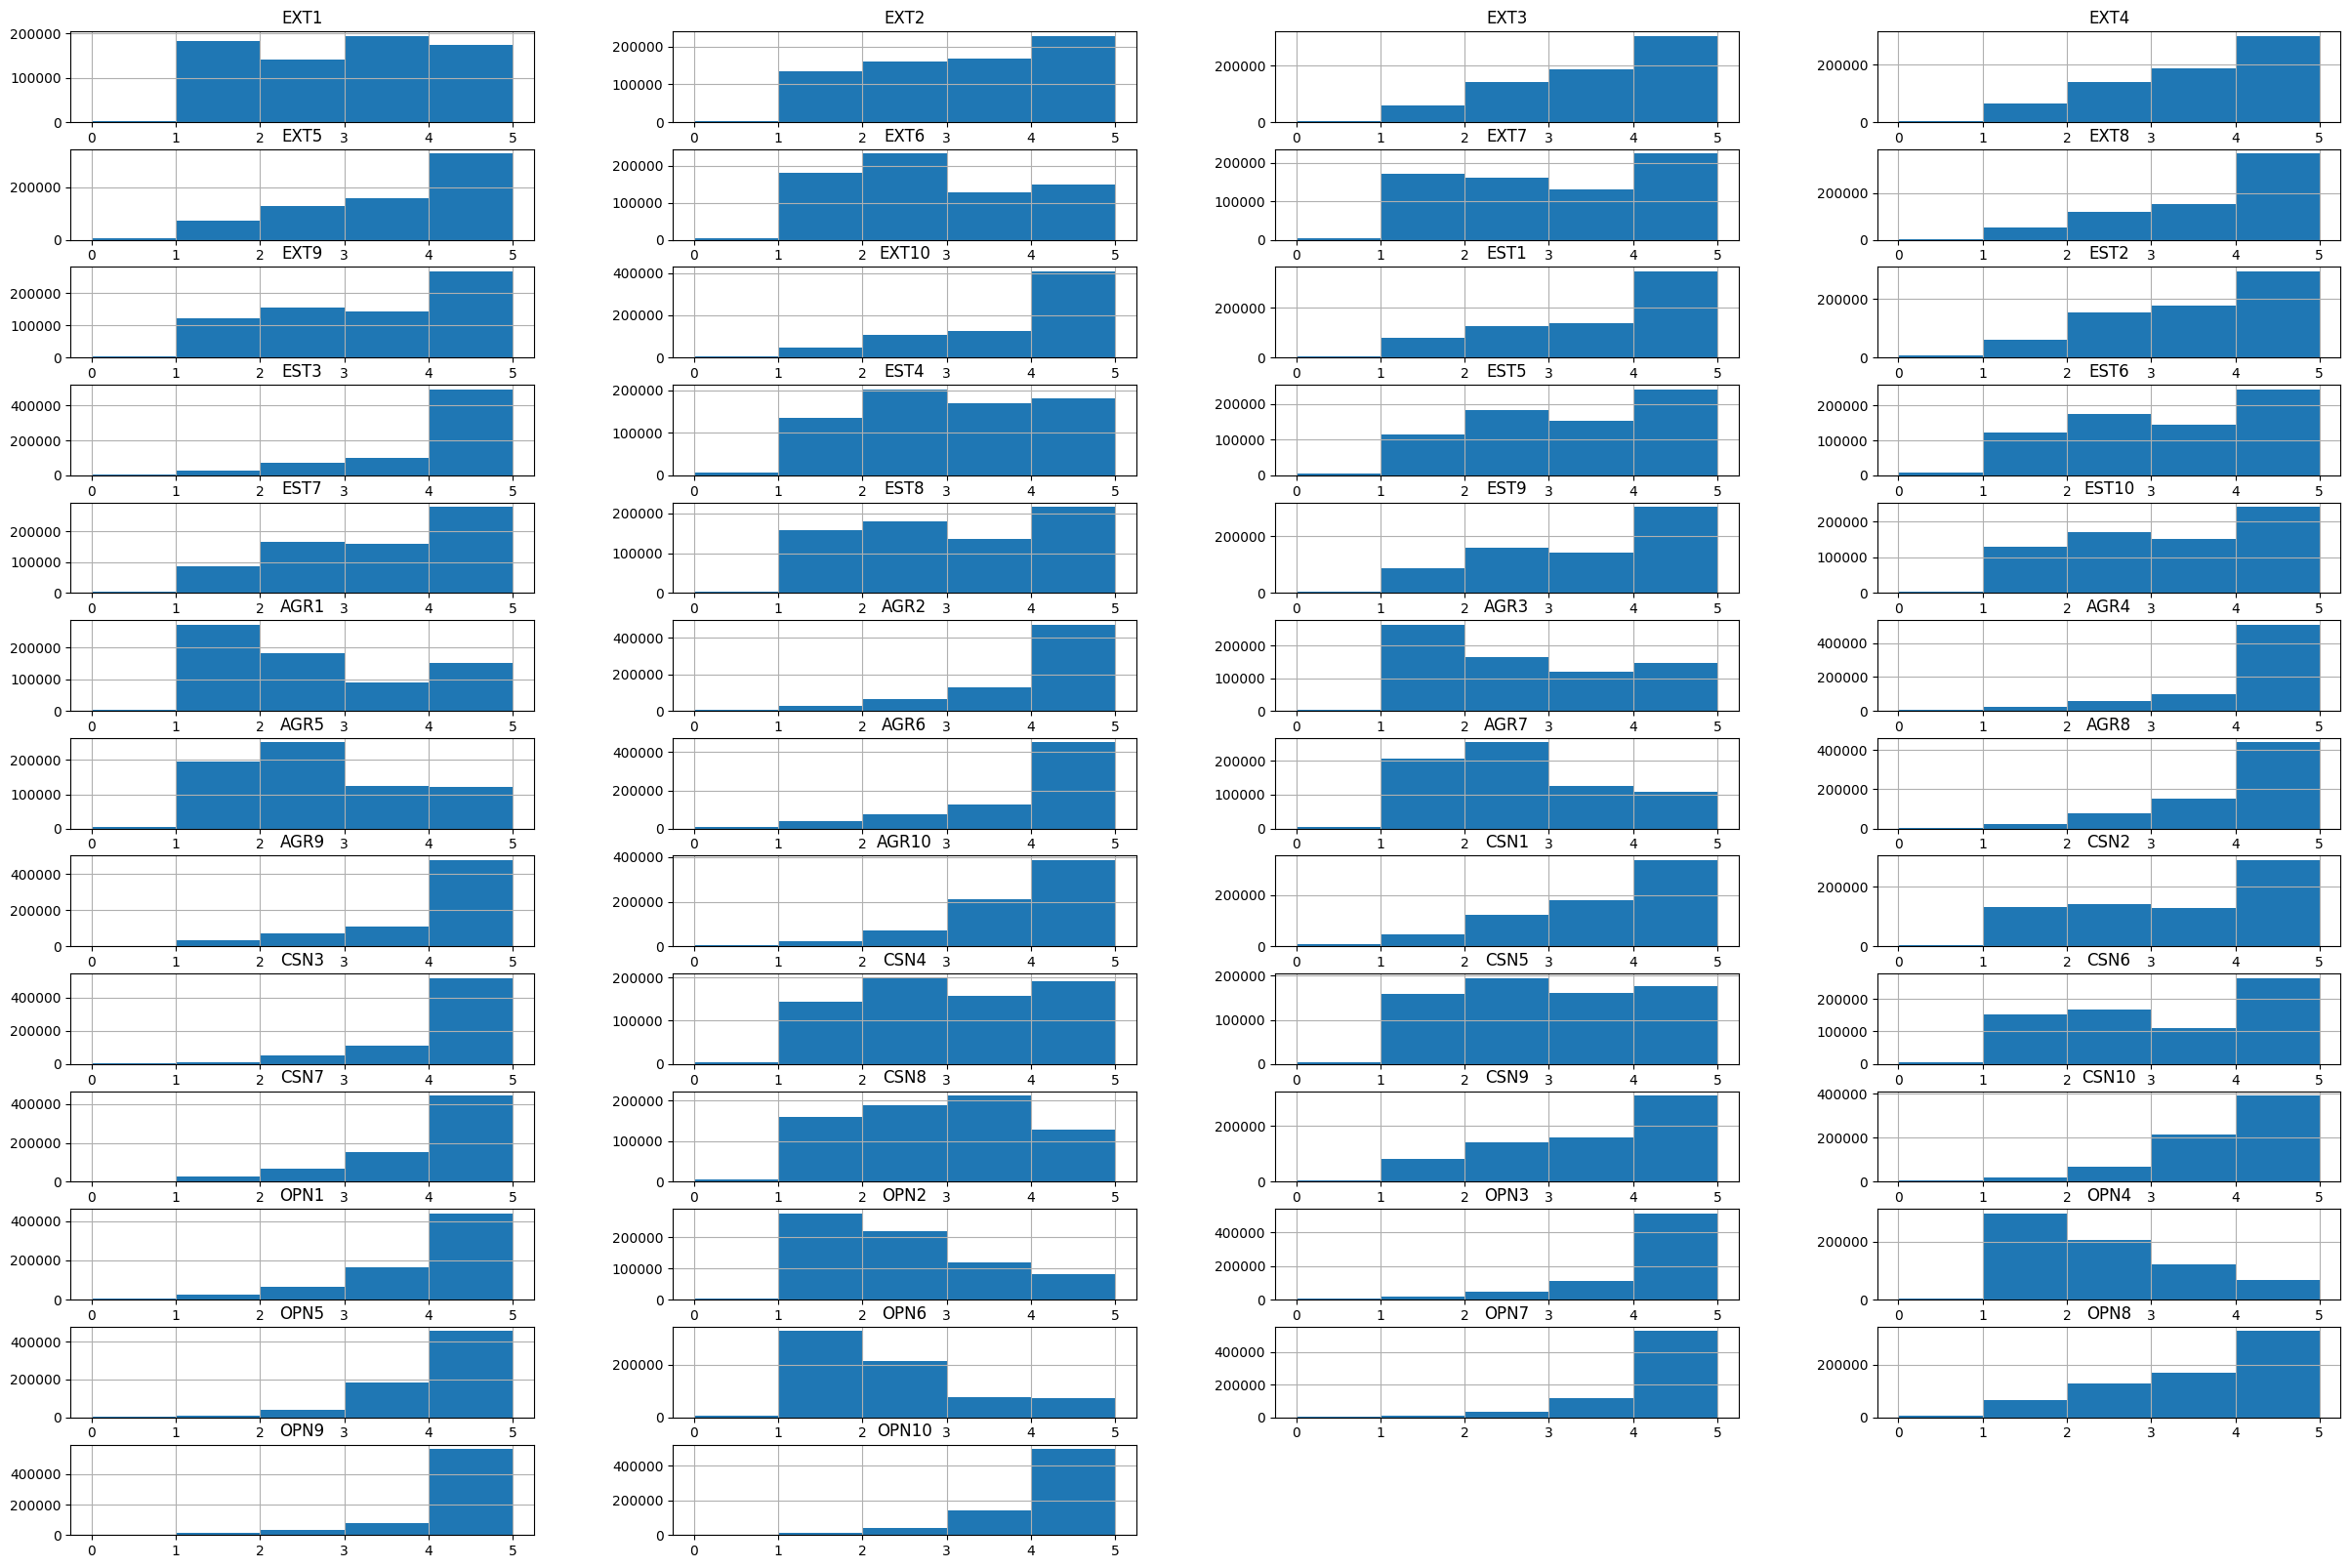

In [42]:
import matplotlib.pyplot as plt

data.hist(layout=((50 // 4) + 1, 4), bins=5,figsize=(30, 20));

The current step entails developing a correlation heatmap for the survey variables, which would reveal information about the connections among the different survey questions.

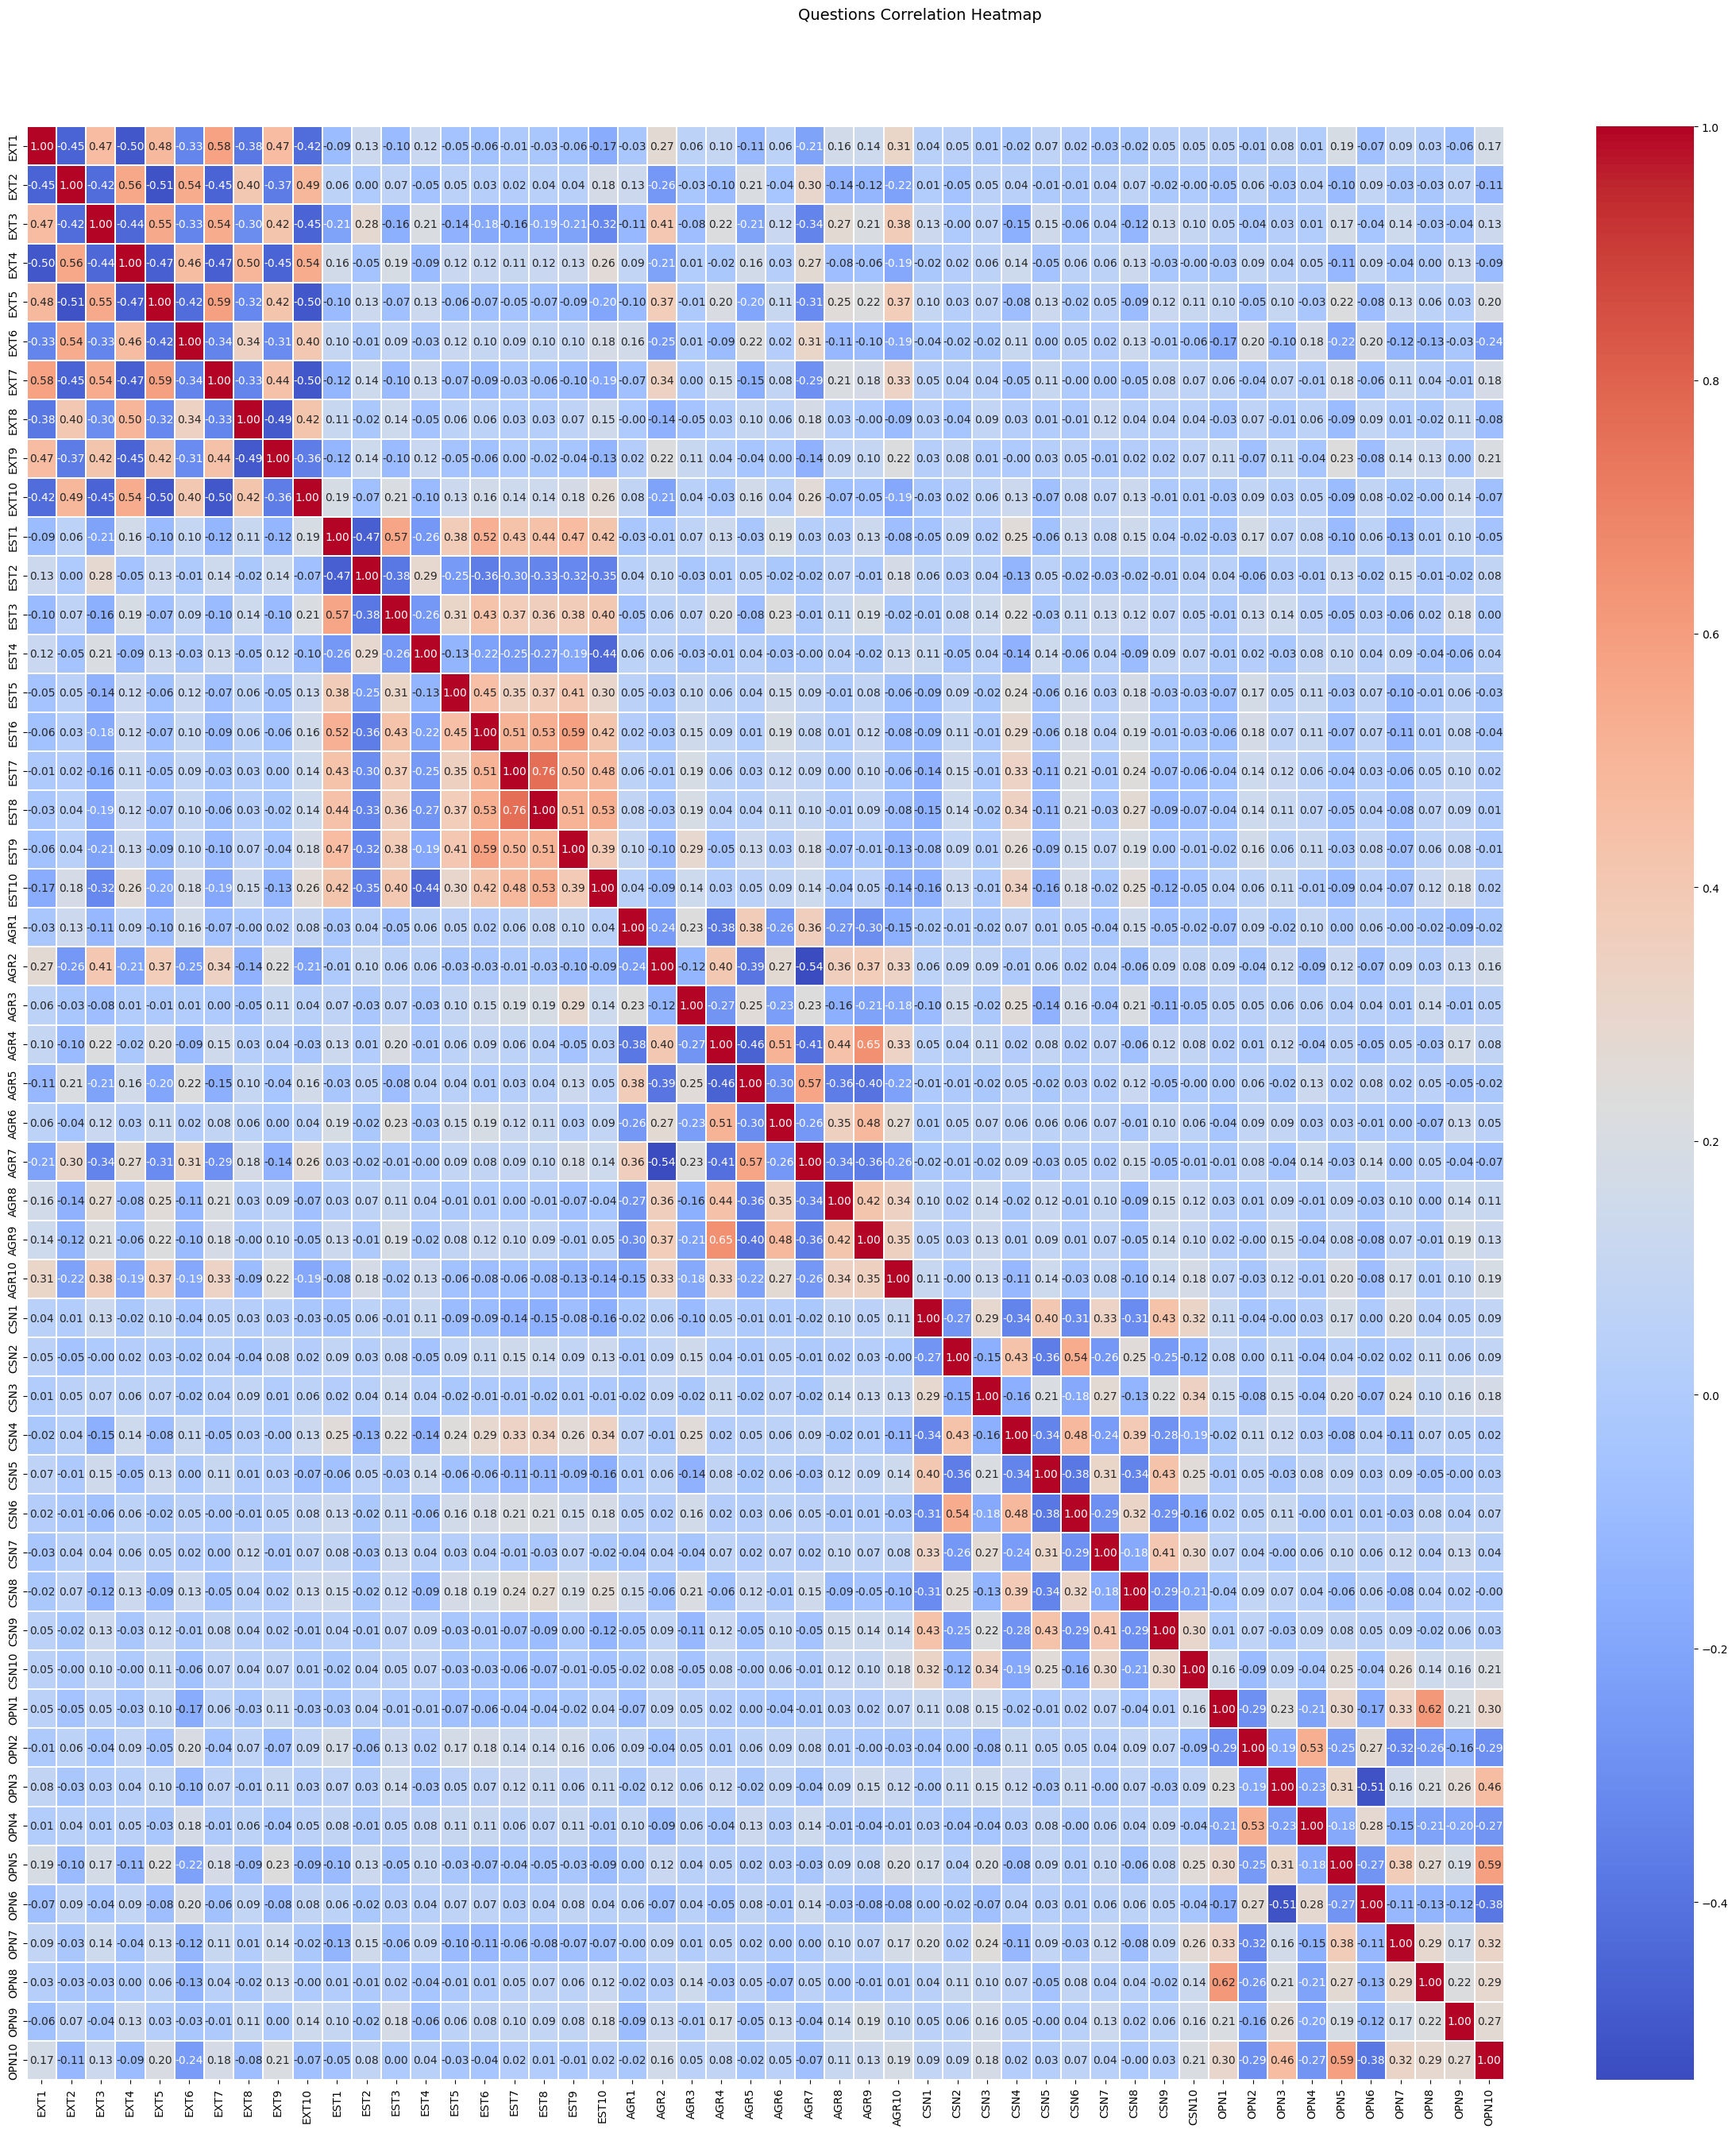

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30, 30))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Questions Correlation Heatmap', fontsize=14)

# Experimenting

Prior to using Principal Component Analysis (PCA) to reduce the number of dimensions to 4, the data standardization process is carried out in this particular step. The data would then be visualized using this lower-dimensional representation, and a suitable value for K (number of clusters) in K-means clustering would be chosen.

In [44]:
from matplotlib import figure, pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pca = PCA(n_components=4)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(data)
print(Xt.shape)

(695704, 4)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_13208\1141371609.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


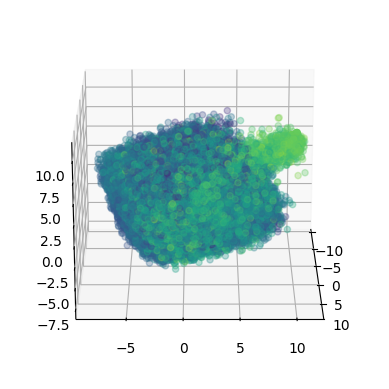

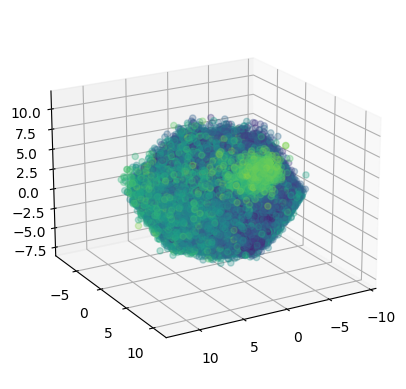

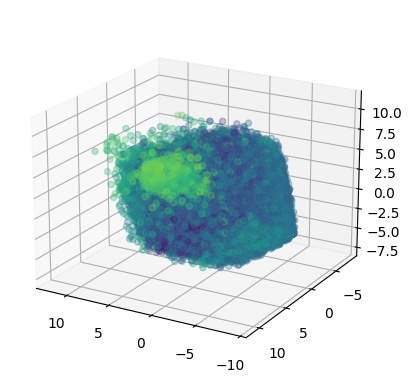

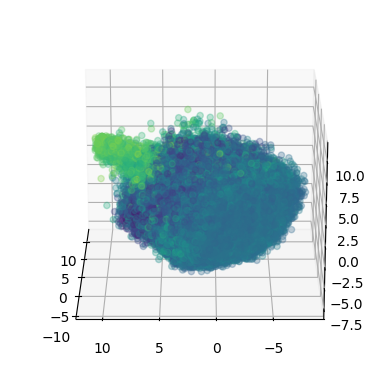

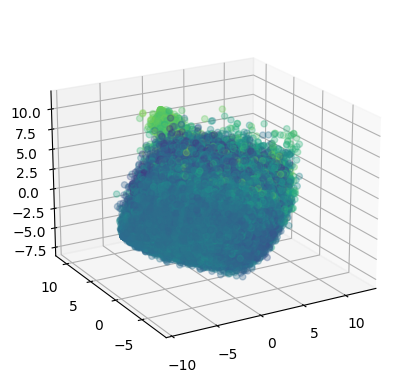

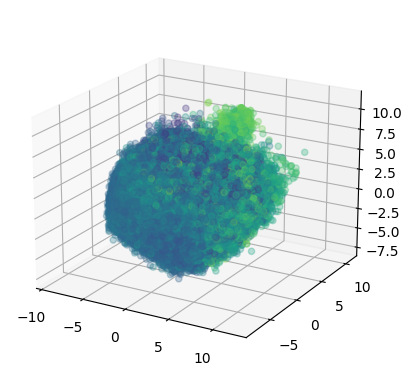

In [45]:
for i in range(6):
    fig = plt.figure(i)
    ax = fig.add_subplot(projection='3d')
    ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=Xt[:, 3], alpha=.3)
    ax.view_init(elev=20., azim=60 * i)
    fig.show()

Based on the results of the previous step, the number of clusters (K) has been tentatively set to 4. The next step would involve fine-tuning this value by exploring the values in the vicinity of 4 to obtain the optimal number of clusters for the K-means clustering algorithm.

The Within-Cluster-Sum of Squared Errors (WSS) method will be utilized in the current step to determine the optimal value of K for the K-means clustering algorithm.

In [46]:
# Code taken from: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [47]:
res = calculate_WSS(Xt, 20)
print(res)

[8570279.019061163, 5270065.804890498, 3802954.666328317, 3505408.364899834, 3097053.3357219067, 3239733.7169725797, 3021921.0665506995, 2907571.341782432, 2777850.445342102, 2566167.75000349, 2430415.074707972, 2355203.9929367774, 2229667.610608599, 2211777.0457868394, 2079233.426748531, 2040230.1692281377, 1971216.613473496, 1895189.4812694355, 1913501.2725096962, 1846458.1589803775]


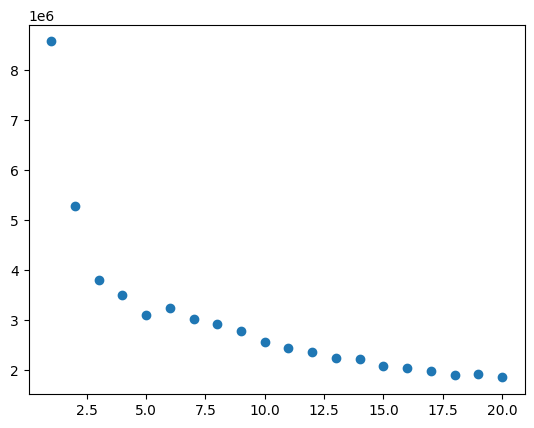

In [48]:
from matplotlib.pyplot import scatter

scatter(range(1, 21), res)

In addition to the WSS method, the Calinski Harabasz Score (CHS) method will also be employed in the current step to confirm the optimal value of K for the K-means clustering algorithm.

In [49]:
from sklearn.metrics import calinski_harabasz_score

def calculate_CHS(points, kmax):
  chs = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    pred_clusters = kmeans.predict(points)
    curr_chs = 0
    
    curr_chs = calinski_harabasz_score(points, pred_clusters)
      
    chs.append(curr_chs)
  return chs

In [50]:
res = calculate_CHS(Xt, 20)
print(res)

[220940.37956757663, 186883.2901142297, 170186.97100745648, 158736.572380534, 151424.04608023458, 141232.54964647294, 134062.50234488116, 129669.81012729795, 125350.97921635545, 121021.857791892, 117249.5265244025, 114158.6433225164, 111135.64102460824, 108447.19407177124, 106347.60222740844, 103915.59089933019, 101650.36338298598, 99436.06411529632, 97496.8935938765]


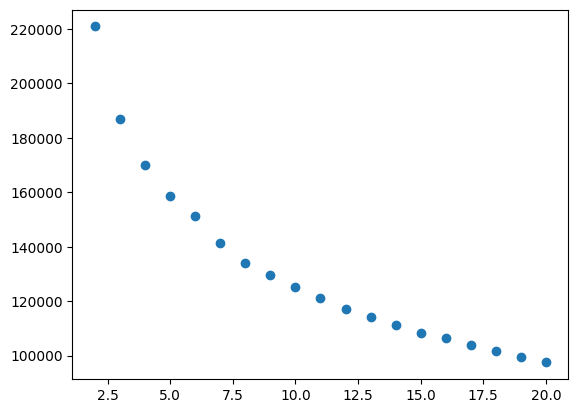

In [51]:
scatter(range(2, 21), res)

In order to further validate the results obtained from the WSS and CHS methods, the Davies Bouldin Score (DBS) method will also be utilized in the present step to determine the optimal value of K for the K-means clustering algorithm.

In [52]:
from sklearn.metrics import davies_bouldin_score

def calculate_DBS(points, kmax):
  dbs = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    pred_clusters = kmeans.predict(points)
    curr_dbs = 0
    
    curr_dbs = davies_bouldin_score(points, pred_clusters)
      
    dbs.append(curr_dbs)
  return dbs

In [53]:
res = calculate_DBS(Xt, 20)
print(res)

[1.640826040846749, 1.5929262277442504, 1.5460283042585619, 1.4080112771217441, 1.336665579184891, 1.3690117072062677, 1.3618070288694109, 1.2723952934168863, 1.2335858420543273, 1.2611173579041912, 1.2521029588534438, 1.2191306649157403, 1.2197699395075052, 1.2156315051637518, 1.2195331343693736, 1.2172791350798602, 1.2074413119976066, 1.21200993674139, 1.203903405459838]


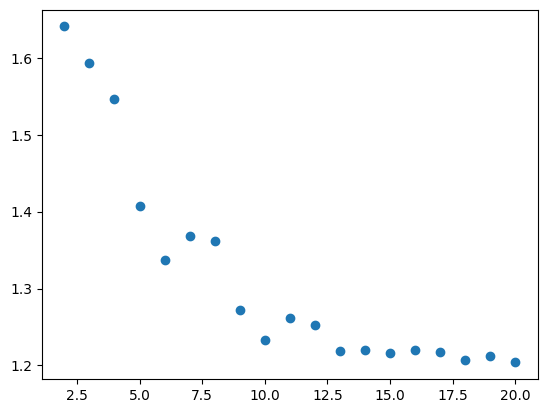

In [54]:
scatter(range(2, 21), res)

Based on the results obtained from the WSS, CHS, and DBS methods, it can be concluded that k=10 is the optimal value for the K-means clustering algorithm. Hence, k=10 will be utilized in the K-means model for further analysis of the data.

In [55]:
kmeans = KMeans(n_clusters = 10).fit(Xt)
centroids = kmeans.cluster_centers_

The subsequent step involves the visualization of the centroids (centers) of the clusters obtained through the K-means clustering algorithm. This would provide insights into the characteristics of each cluster and help identify any patterns or trends in the data.

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13208\752968015.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


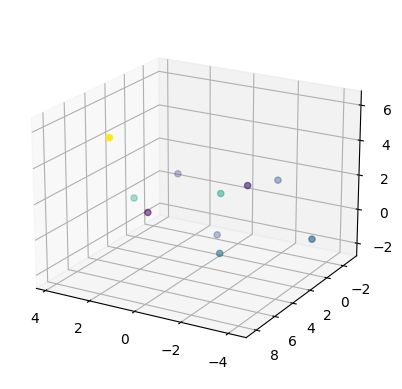

In [56]:
fig = plt.figure(1)
ax = fig.add_subplot(projection='3d')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c=centroids[:, 3])
ax.view_init(elev=20., azim=120)
fig.show()

The current step involves visualizing the data after assigning each data point to its corresponding cluster. This would allow for a better understanding of how the K-means clustering algorithm has grouped the data points based on their similarities.

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13208\2667195135.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


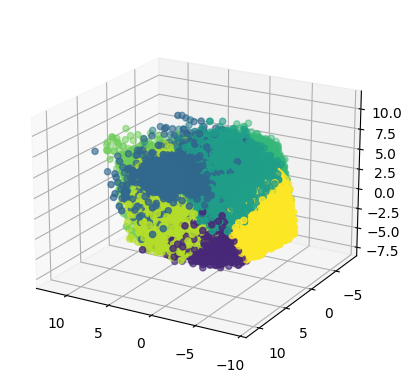

In [57]:
Xt_transformed = kmeans.transform(Xt)

fig = plt.figure(1)
ax = fig.add_subplot(projection='3d')
ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=np.argmin(Xt_transformed[:], axis=1))
ax.view_init(elev=20., azim=120)
fig.show()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13208\1297970023.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


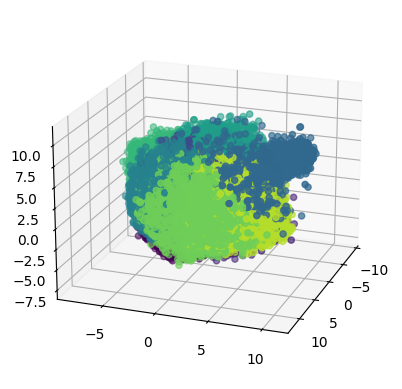

In [58]:
fig = plt.figure(2)
ax = fig.add_subplot(projection='3d')
ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=np.argmin(Xt_transformed[:], axis=1))
ax.view_init(elev=20., azim=20)
fig.show()

# Exporting Values

In this final step, the necessary values obtained from the data preprocessing and K-means clustering analysis will be exported for further use or analysis.

In [59]:
import pickle as pk
pk.dump(pca, open("pca.pkl","wb"))

In [61]:
print(centroids)
with open('cluster_centers.pkl', 'wb') as f:
    pk.dump(centroids, f)

[[ 0.65816276 -1.24345945 -2.13923283 -0.31232172]
 [-0.8027037   2.07067044 -1.71011818  0.42443223]
 [-0.02742723  0.06202015  0.91437895  1.98951465]
 [ 1.37065318  8.24955613  6.19062265  4.89252727]
 [ 2.74960955 -1.84613404  0.79368902 -1.05460013]
 [-1.63201819  1.08782521  2.10165447 -1.39378526]
 [-1.4559407  -2.87944546  1.13639728 -0.17672055]
 [ 3.83854729  0.43856209 -0.21753417  1.70739414]
 [ 2.21122345  2.65688197  0.06568979 -2.17159119]
 [-4.15854125  0.26652933 -0.57626357  0.15311068]]
